<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>

<i><b>Parcial Final
<br>
<br>
<i><b>Regresión Logística
<br>
<i><b>Ingeniero en formación:</b></i> 
<br>
<i><b>Shelsy Rodriguez
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Metricas de rendimiento - HPC
<br>
20/11/22
<br>
</FONT>
</div>

### 1. Se importan los modulos que se van a usar en la implementacion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### 2. Se importa el dataset sobre el que se hara el desarrollo de la regresión logistica

In [2]:
# Se lee el archivo csv
df = pd.read_csv('https://raw.githubusercontent.com/shelsyrod/HCP-2/main/Parcial3/data.csv')

In [3]:
# Se visualizan los primeros 5 registros del dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3. EDA - Analisis exploratorio de datos

In [4]:
# Se visualiza el tamaño del dataset
df.shape

(569, 33)

> El dataframe cuenta con 569 filas y 33 columnas

In [5]:
# se visualiza el nombre de las columnas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Se visualiza una pequeña descripcion de cada variable,
# la cantidad de valores, el promedio, la desviacion estandar, 
# los quartiles, el minimo y el maximo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
# Se visualida informacion de las columnas
# el tipo de dato, la cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

> Podemos observar que la ultima columna ['Unnamed: 32'] tiene unicamente valores nulos, por lo que vamos a eliminarla del dataframe

In [8]:
# se elimina la ultima columna Unnamed: 32
df = df.drop(['Unnamed: 32'], axis=1)

In [9]:
# volvemos a visualizar la informacion del df para comprobar
# que la columna ['Unnamed: 32'] se ha eliminado correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### graficas para visualizar los datos

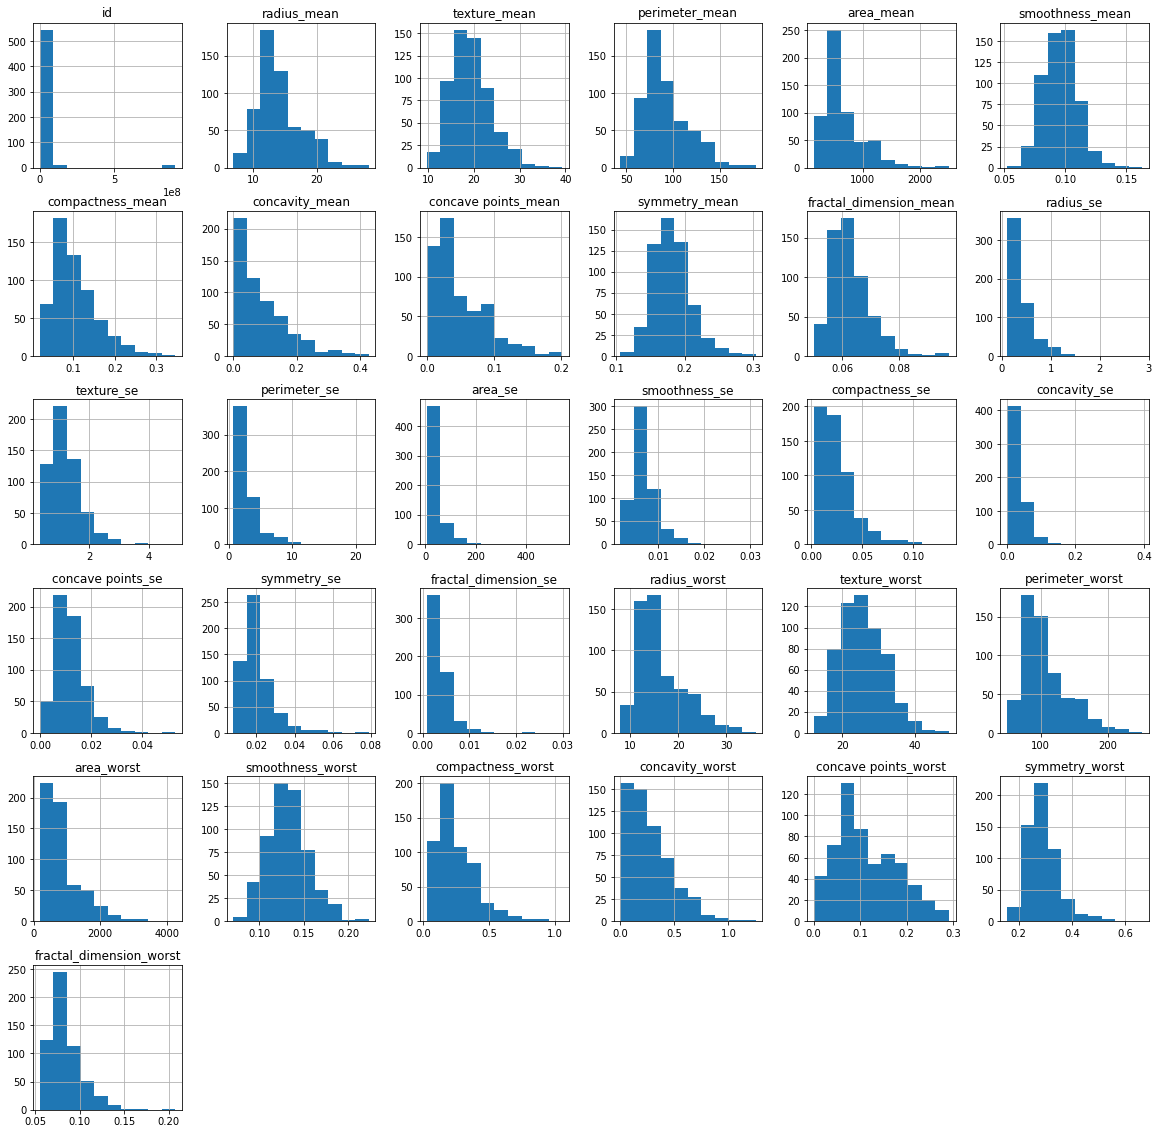

In [10]:
# histograma de las variables
# para ver la distribucion de los datos
df.hist(figsize=(20,20))
plt.show()

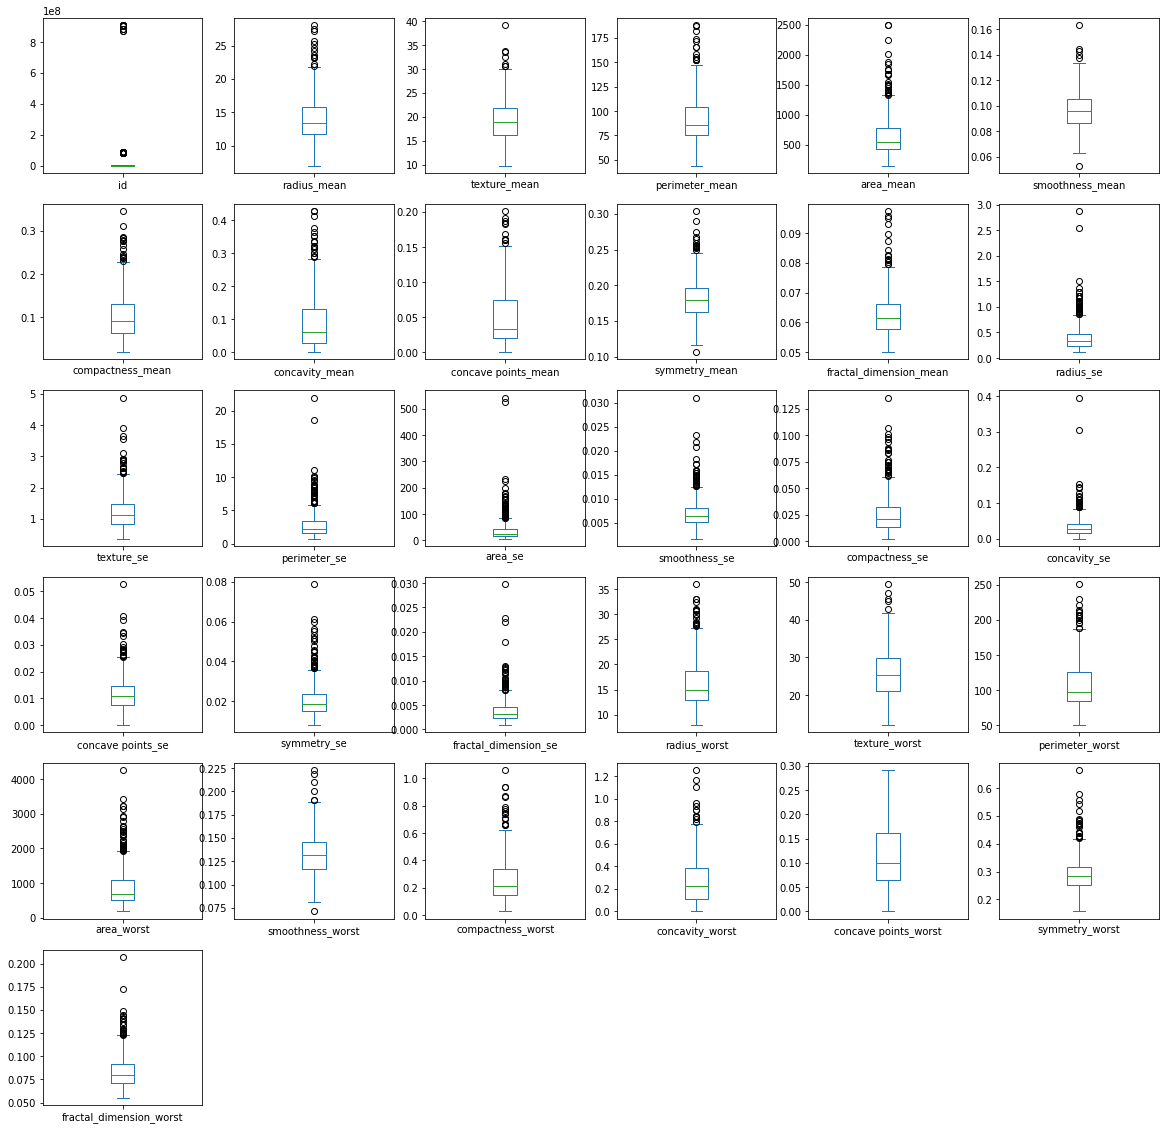

In [11]:
# grafico de cajas y bigotes para representar la distribucion de las variables
# y visualizar los outliers(los puntos que se salen de la distribucion)
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,20))
plt.show()

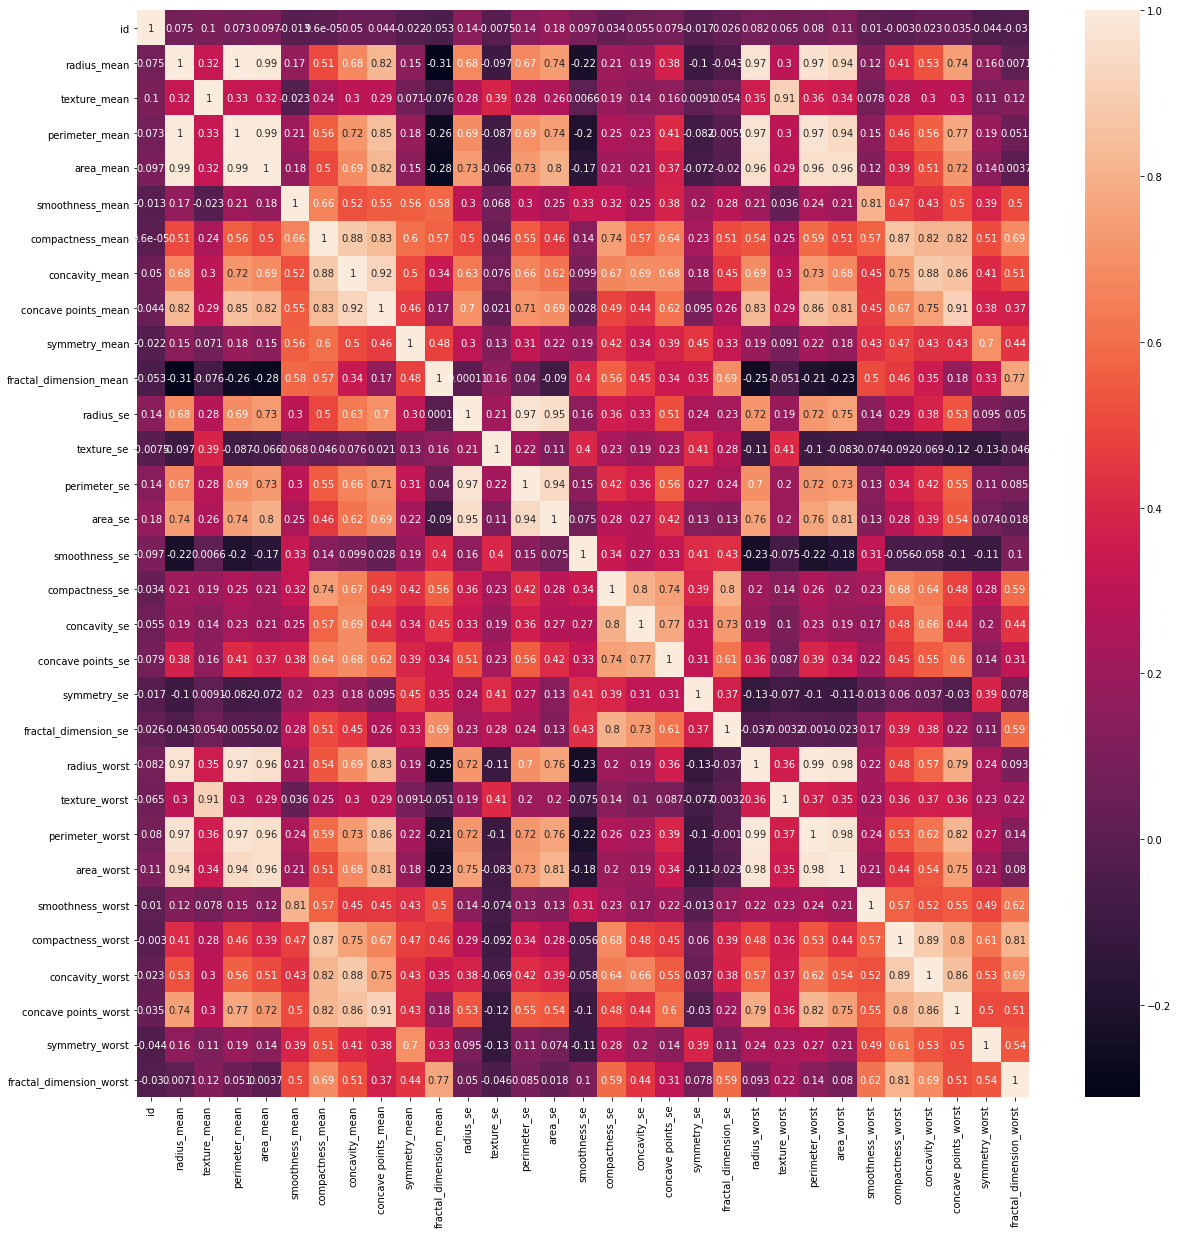

In [12]:
# matriz de correlacion
# para ver la relacion entre las variables
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

### 4. Normalizamos los datos

In [13]:
# Normalizar los datos. Se normalizan los datos para que los 
# valores esten entre 0 y 1 y asi poder trabajar con ellos

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Podemos ver que la variable diagnostic que anteriormente era categorica, ahora es numerica

In [15]:
# se crea un pipeline para pasar los datos de categoricos a numericos 
# y los numerios se estandarizarlos para asi poder trabajar con ellos
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder()),
])

# se separan los datos en variables categoricas y numericas
df_num = df.drop(['diagnosis'], axis=1)
df_cat = df[['diagnosis']]

In [16]:
# se visualizan los datos numericos
df_num.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# se visualizan los datos categoricos
df_cat.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


### 5. Separa los datos para el entrenamiento

In [18]:
# variables independientes
# - Se elimina la columna diagnosis del df
#   ya que es la variable que se quiere predecir
X = df.drop(['diagnosis'], axis=1)

# variable dependiente
y = df['diagnosis']

In [19]:
# Revisamos que esten bien separados los datos
# se visualizan los datos de X
X.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
# se visualizan los datos de y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Se puede observar que *y* corresponde a la variable objetivo que es la que se quiere predecir y corresponde a diagnostic que es del tipo flotante

In [21]:
# Se separan los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Se visualiza el tamaño de los datos de entrenamiento y prueba
print('Tamaño de X_train: ',X_train.shape)
print('Tamaño de X_test: ',X_test.shape)
print('Tamaño de y_train: ',y_train.shape)
print('Tamaño de y_test: ',y_test.shape)

Tamaño de X_train:  (455, 31)
Tamaño de X_test:  (114, 31)
Tamaño de y_train:  (455,)
Tamaño de y_test:  (114,)


### 6. Entrenar el modelo

In [23]:
# Entrenamiento del modelo de regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# predice la variable objetivo
y_pred = logreg.predict(X_test)

In [25]:
logreg.score(X_test, y_test)

0.5877192982456141

### 7. Se aplican metricas de rendimiento para evaluar el modelo

In [26]:
# Se calcula la matriz de confusion con el objetivo
# de evaluar el desempeño del modelo con metricas
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[67  0]
 [47  0]]


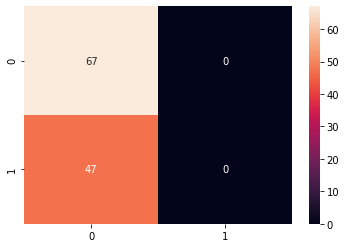

In [27]:
# grafica la matriz de confusion para una mejor visualizacion
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [28]:
# calcula accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.5877192982456141


In [29]:
# calcula la precision
precision_score(y_test, y_pred, average='macro')

/home/shelsy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.29385964912280704

In [30]:
# calcula el recall
recall_score(y_test, y_pred, average='macro')

0.5

In [31]:
# calcula el f1-score
f1_score(y_test, y_pred, average='macro')

0.3701657458563536

### Al usar todas las variables el modelo tiene una baja precision, no es un buen modelo por lo se procede a usar solo las variables mas importantes para el modelo

In [32]:
# se selecionan las variables mas importantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# se seleccionan las 10 variables mas importantes
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# se concatenan los datos
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
0                id  4.622948e+08
24       area_worst  1.125984e+05
4         area_mean  5.399166e+04
14          area_se  8.758505e+03
23  perimeter_worst  3.665035e+03
3    perimeter_mean  2.011103e+03
21     radius_worst  4.916892e+02
1       radius_mean  2.661049e+02
13     perimeter_se  2.505719e+02
22    texture_worst  1.744494e+02


### Volvemos a repetir los pasos 5, 6 y 7 que corresponden a separar los datos, entrenar el modelo y aplicar las metricas de rendimimento con el nuevo df con las caracteristicas mas revelantes

### 5. Separa los datos para el entrenamiento

In [33]:
# variables independientes
# - Se usan las 10 variables mas importantes
X = df[['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']]

# variable dependiente
y = df['diagnosis']

In [34]:
# Revisamos que esten bien separados los datos
# se visualizan los datos de X
X

,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst
0,17.99,122.80,1001.0,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0
1,20.57,132.90,1326.0,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0
2,19.69,130.00,1203.0,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0
3,11.42,77.58,386.1,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7
4,20.29,135.10,1297.0,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0
565,20.13,131.20,1261.0,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0
566,16.60,108.30,858.1,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0
567,20.60,140.10,1265.0,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0


In [35]:
# se visualizan los datos de y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [36]:
# Se separan los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# Se visualiza el tamaño de los datos de entrenamiento y prueba
print('Tamaño de X_train: ',X_train.shape)
print('Tamaño de X_test: ',X_test.shape)
print('Tamaño de y_train: ',y_train.shape)
print('Tamaño de y_test: ',y_test.shape)

Tamaño de X_train:  (455, 10)
Tamaño de X_test:  (114, 10)
Tamaño de y_train:  (455,)
Tamaño de y_test:  (114,)


### 6. Entrenar el modelo

In [38]:
# Entrenamiento del modelo de regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/shelsy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# predice la variable objetivo
y_pred = logreg.predict(X_test)

In [40]:
logreg.score(X_test, y_test)

0.9385964912280702

### 7. Se aplican metricas de rendimiento para evaluar el modelo

In [41]:
# Se calcula la matriz de confusion con el objetivo
# de evaluar el desempeño del modelo con metricas
from sklearn.metrics import confusion_matrix
confusion_matri = confusion_matrix(y_test, y_pred)
print(confusion_matri)

[[62  5]
 [ 2 45]]


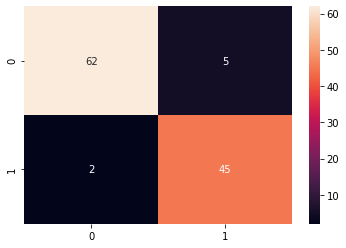

In [42]:
# grafica la matriz de confusion para una mejor visualizacion
import seaborn as sns
sns.heatmap(confusion_matri, annot=True, fmt='d')
plt.show()

In [43]:
# calcula accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9385964912280702


In [44]:
# calcula la precision
precision_score(y_test, y_pred, average='macro')

0.934375

In [45]:
# calcula el recall
recall_score(y_test, y_pred, average='macro')

0.9414099714194983

In [46]:
# calcula el f1-score
f1_score(y_test, y_pred, average='macro')

0.9371999685212875

### 8. Conclusiones

* El modelo inicial que fue entrenado con todas las variables del dataframe no era el mas optimo, por lo que se optó por seleccionar unicamente las variables mas influyentes (con unas mayor correlación) y este segundo modelo, dio mejores resultados, con un acuraccy casi del doble de valor, con esto se puede concluir que para tener un mejor modelo es importante entrenarlo con variables importantes, con altos pesos que en lugar entrenarlo con una alta cantidad de caracteristicas que no representan nada

* La distancia a la que se va a desplazar el algoritmo (learning rate)  en cada iteración de búsqueda es muy importante debido a que si es muy pequeño, se tardará demasiado en llegar al mínimo y, si es demasiado grande, el algoritmo saltará de una región a otra pasando por encima del mínimo sin alcanzarlo.

* La presicion y el acuraccy del modelo son altos, lo que representa que el modelo de regresion logistica es aceptable y se ajusta

### 9. Referencias

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20un,de%20modelos%20de%20clasificaci%C3%B3n%20binaria.

* https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/

### Se exporta el dataframe a un archivo csv para trabajar con el en Qt

In [48]:
# unir x y y en un solo dataframe
df = pd.concat([X, y], axis=1)
print(df.head())

# exportar el dataframe a un archivo csv
df.to_csv('cancer.csv', index=False)

   radius_mean  perimeter_mean  area_mean  concave points_mean  radius_se  \
0        17.99          122.80     1001.0              0.14710     1.0950   
1        20.57          132.90     1326.0              0.07017     0.5435   
2        19.69          130.00     1203.0              0.12790     0.7456   
3        11.42           77.58      386.1              0.10520     0.4956   
4        20.29          135.10     1297.0              0.10430     0.7572   

   perimeter_se  area_se  radius_worst  perimeter_worst  area_worst  diagnosis  
0         8.589   153.40         25.38           184.60      2019.0          1  
1         3.398    74.08         24.99           158.80      1956.0          1  
2         4.585    94.03         23.57           152.50      1709.0          1  
3         3.445    27.23         14.91            98.87       567.7          1  
4         5.438    94.44         22.54           152.20      1575.0          1  
